### Training of ML algorithms on our combined Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('Datasets/sp500_with_sentiment.csv')
data.Price_change = data.Price_change.astype(int)
data

,Unnamed: 0,date,Volume,Close,Positive,Negative,Neutral,Price_change
0,0,2010-01-05,1.559430e+07,1136.520020,0.018545,0.478500,0.502955,1
1,1,2010-01-07,1.205820e+07,1141.689941,0.838794,0.010908,0.150297,1
2,2,2010-01-12,2.307580e+07,1136.219971,0.843512,0.008981,0.147506,-1
3,3,2010-01-14,1.320820e+07,1148.459961,0.492235,0.017017,0.490748,1
4,4,2010-01-21,1.890060e+07,1116.479980,0.009232,0.969351,0.021417,-1
...,...,...,...,...,...,...,...,...
2211,2211,2020-06-05,5.374403e+07,3193.929932,0.357551,0.130090,0.512359,1
2212,2212,2020-06-08,6.667680e+07,3232.389893,0.290582,0.216999,0.492419,1
2213,2213,2020-06-09,7.317539e+07,3207.179932,0.346078,0.208795,0.445127,-1
2214,2214,2020-06-10,9.306736e+07,3190.139893,0.383614,0.063217,0.553169,-1


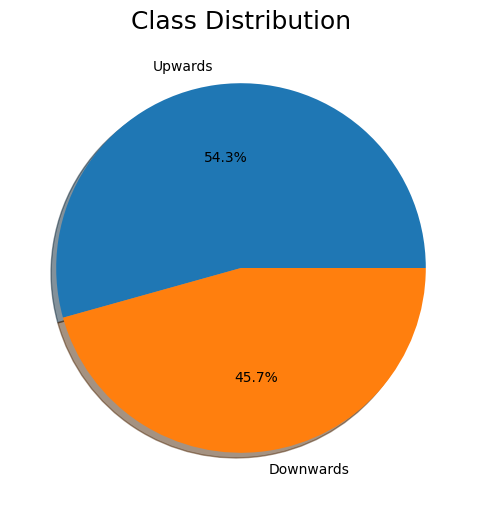

,Unnamed: 0,Volume,Close,Positive,Negative,Neutral,Price_change
count,2216.00000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1107.50000,2.625174e+07,2088.369015,0.254067,0.191056,0.554877,0.086643
std,639.84842,2.655757e+07,606.859174,0.206637,0.199015,0.241427,0.996464
min,0.00000,1.608400e+06,1022.580017,0.006782,0.006665,0.011502,-1.000000
25%,553.75000,9.040762e+06,1520.194977,0.076149,0.037393,0.397491,-1.000000
50%,1107.50000,1.709916e+07,2071.380005,0.209601,0.122395,0.550275,1.000000
75%,1661.25000,3.312219e+07,2647.697571,0.371393,0.280785,0.742700,1.000000
max,2215.00000,2.572706e+08,3386.149902,0.958342,0.973520,0.951239,1.000000


In [3]:
ones = len(data[data['Price_change']==1])
minus = len(data[data['Price_change']==-1])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[ones, minus], labels=['Upwards','Downwards'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution', fontsize=18)
plt.show()

data.describe()

In [4]:
# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral']])
y = np.array(data['Price_change'])
# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  shuffle=True)

print(f"Train data shapes X:{X_train.shape} , y:{y_train.shape}")
print(f"Test data shapes X:{X_test.shape} , y:{y_test.shape}")

Train data shapes X:(1551, 3) , y:(1551,)
Test data shapes X:(665, 3) , y:(665,)


#### Evaluation metrics 

In [5]:
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True),
           'precision' : make_scorer(precision_score, zero_division=0),
           'recall' : make_scorer(recall_score, average='macro')  }
          

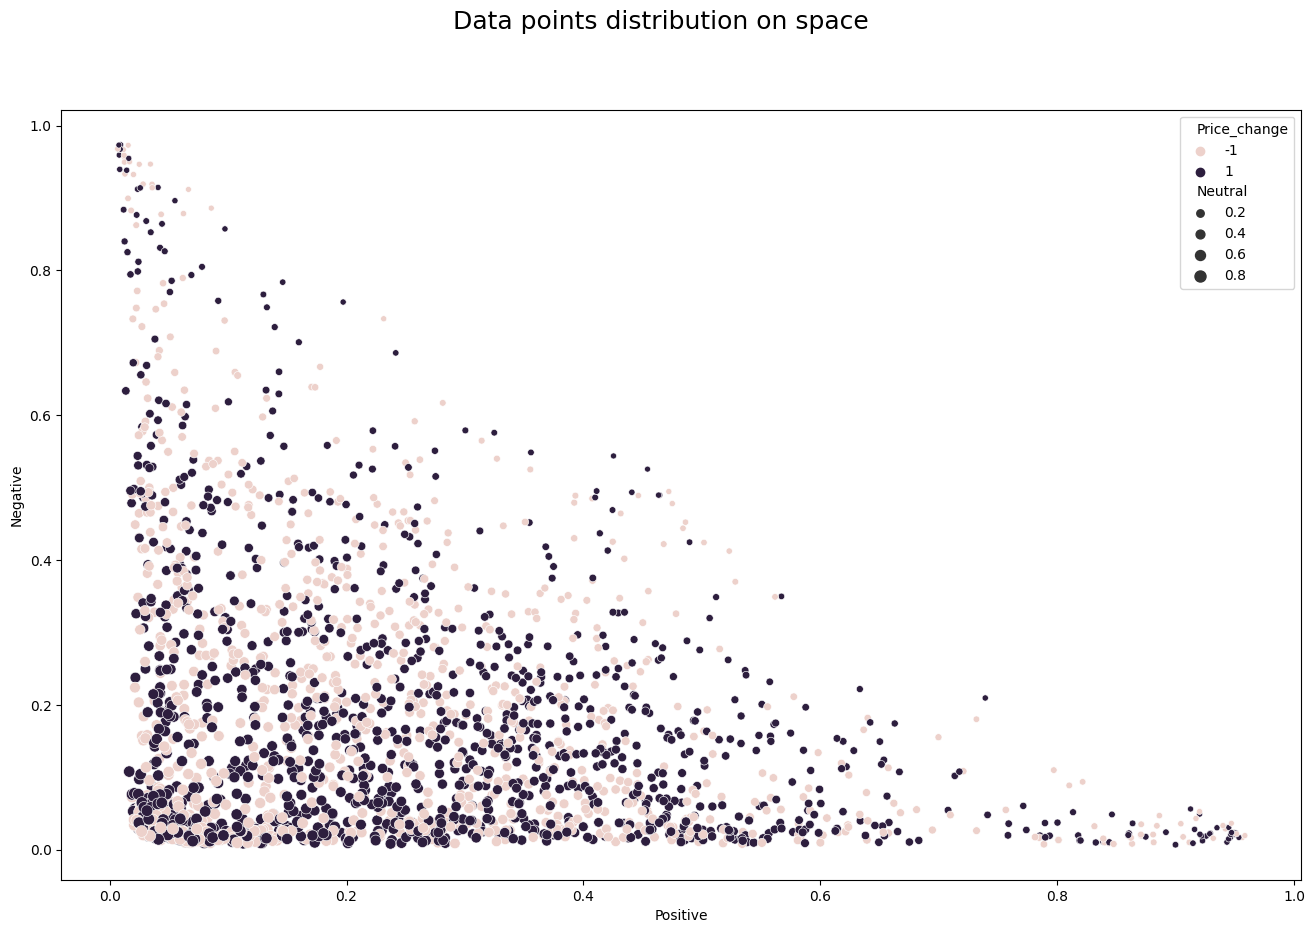

In [6]:
fig , ax = plt.subplots(figsize=(16,10))
fig.suptitle("Data points distribution on space", fontsize=18)
sns.scatterplot(data=data, x="Positive", y="Negative", size='Neutral', hue = 'Price_change')
plt.show()

### Logistic Regression

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  newton-cg
Mean accs :  0.5460989523908308
Mean f1_macro 0.43376988565945584
Mean precision 0.5496817835235083
Mean recall 0.5113580587558251


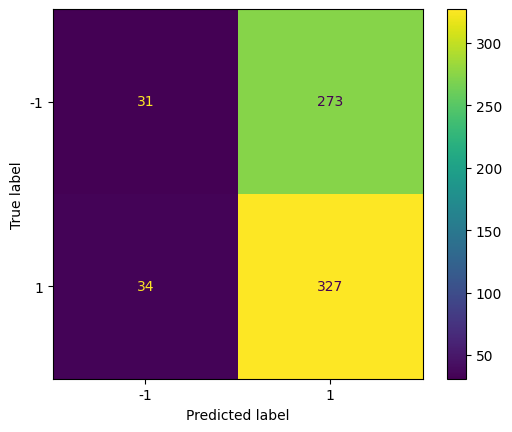

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  lbfgs
Mean accs :  0.5460989523908308
Mean f1_macro 0.43376988565945584
Mean precision 0.5496817835235083
Mean recall 0.5113580587558251


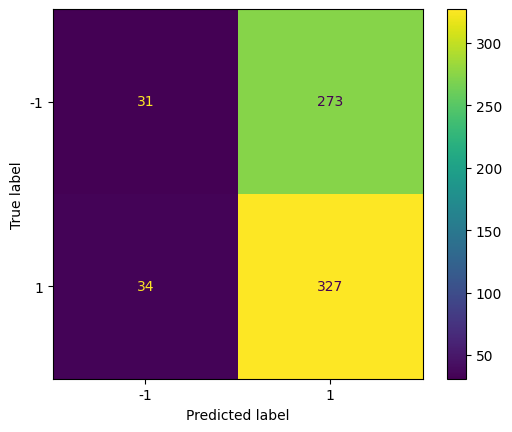

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  liblinear
Mean accs :  0.546742039207551
Mean f1_macro 0.4350012736328431
Mean precision 0.5500699784172524
Mean recall 0.5120622841079377


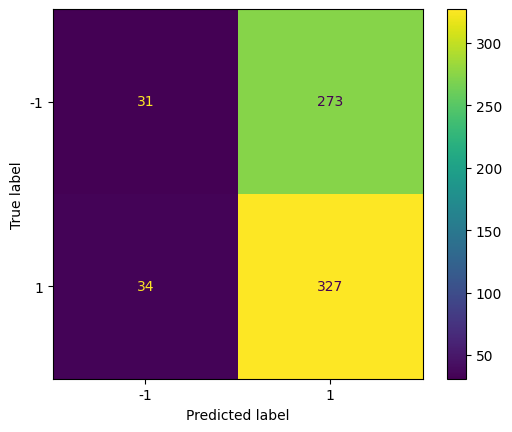

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  sag
Mean accs :  0.5460989523908308
Mean f1_macro 0.43376988565945584
Mean precision 0.5496817835235083
Mean recall 0.5113580587558251


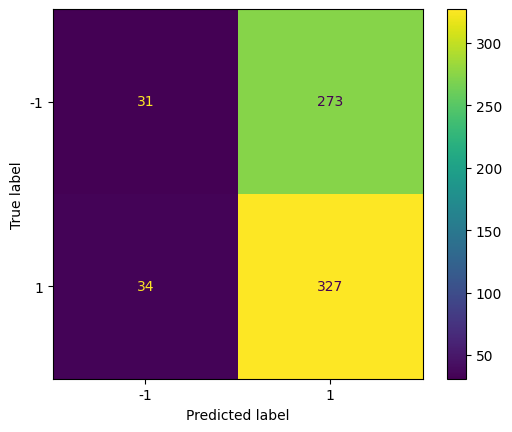

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  saga
Mean accs :  0.5460989523908308
Mean f1_macro 0.43376988565945584
Mean precision 0.5496817835235083
Mean recall 0.5113580587558251


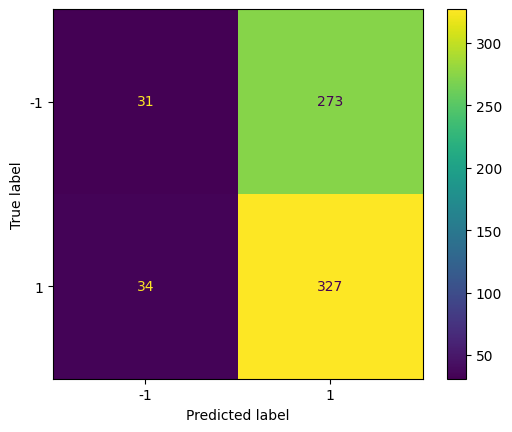

In [7]:
for solver in [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] :
    print("-----------"*10)
    print("Training Logistic Regression with solver ",solver)
    logisticRegr = LogisticRegression(penalty='l2', solver=solver)
    logisticRegr.fit(X_train, y_train)

    # predict model
    # Predict for One Observation
    logisticRegr.predict(X_test[0].reshape(1,-1))

    cv_scores = cross_validate(logisticRegr, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)
    
    predictions = logisticRegr.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logisticRegr.classes_)
    disp.plot()
    plt.show()

In [8]:
logisticRegr = LogisticRegression(penalty='l2', solver='liblinear')
logisticRegr.fit(X_train, y_train)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.5383458646616541


## Nearest Neighbors

------------------------------------------------------------------------------------------
Training with k =  2
Mean accs :  0.48680427341562077
Mean f1_macro 0.47696459387304674
Mean precision 0.5493569891522481
Mean recall 0.5024389633786605


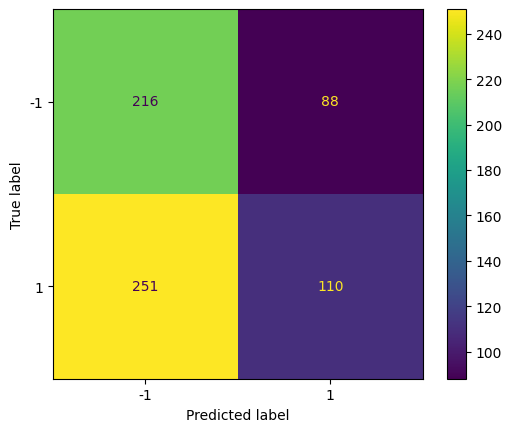

------------------------------------------------------------------------------------------
Training with k =  5
Mean accs :  0.5235349030183591
Mean f1_macro 0.5161613291815075
Mean precision 0.5578791649000377
Mean recall 0.516823647411347


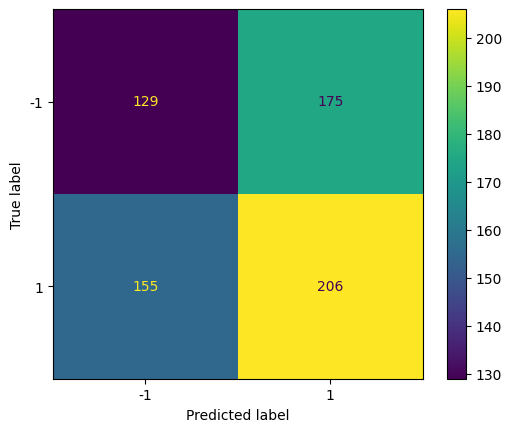

------------------------------------------------------------------------------------------
Training with k =  10
Mean accs :  0.5074307644435224
Mean f1_macro 0.5061942459267346
Mean precision 0.5514860248095111
Mean recall 0.5075176962990753


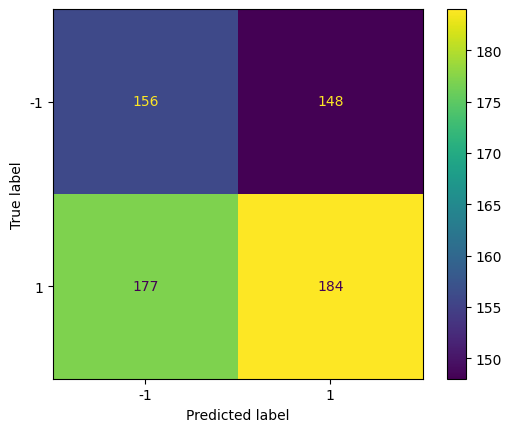

------------------------------------------------------------------------------------------
Training with k =  50
Mean accs :  0.5190332953013173
Mean f1_macro 0.49896284103324595
Mean precision 0.5476293456705827
Mean recall 0.5057271321073447


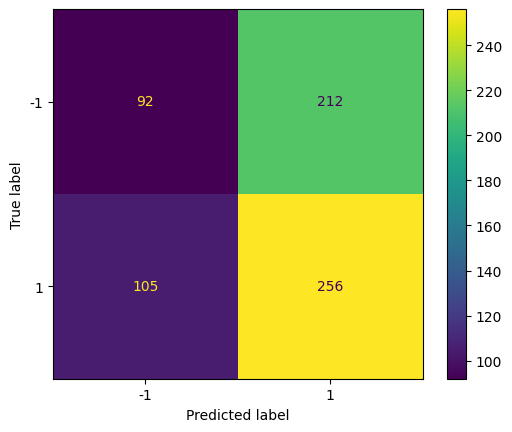

------------------------------------------------------------------------------------------
Training with k =  100
Mean accs :  0.5357888185872834
Mean f1_macro 0.49584599630300935
Mean precision 0.5532770874604329
Mean recall 0.5153780703863113


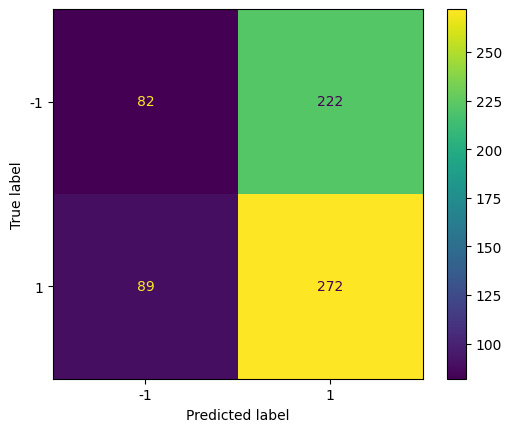

------------------------------------------------------------------------------------------
Training with k =  200
Mean accs :  0.5402987241987345
Mean f1_macro 0.4789553085386625
Mean precision 0.5525198710629706
Mean recall 0.514458256948633


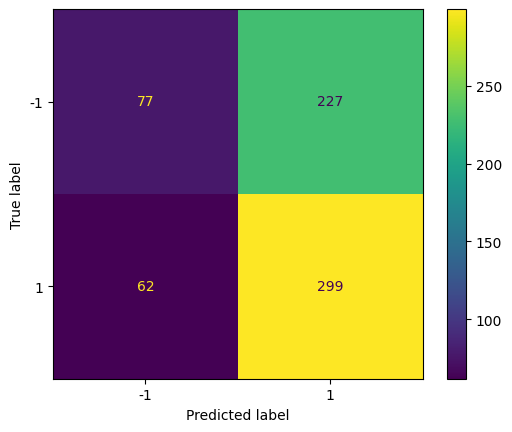

In [9]:
for k in [2, 5 ,10, 50, 100, 200]:
    print("---------"*10)
    print("Training with k = ",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Cross 5 fold validation
    cv_scores = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = knn.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
    disp.plot()
    plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)
# Use score method to get accuracy of model
score = knn.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.5654135338345865


## SVM 

------------------------------------------------------------------------------------------
Training SVM with kernel  rbf
Mean accs :  0.5480219894201847
Mean f1_macro 0.4922961867980219
Mean precision 0.5581911911740008
Mean recall 0.5232823458861355


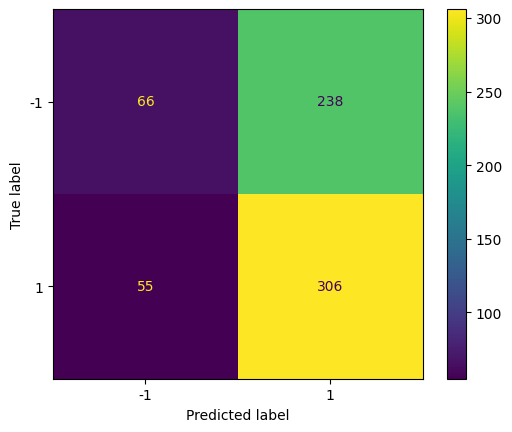

------------------------------------------------------------------------------------------
Training SVM with kernel  poly
Mean accs :  0.5415828233585728
Mean f1_macro 0.45770670922700607
Mean precision 0.5502154728151487
Mean recall 0.5113742138508165


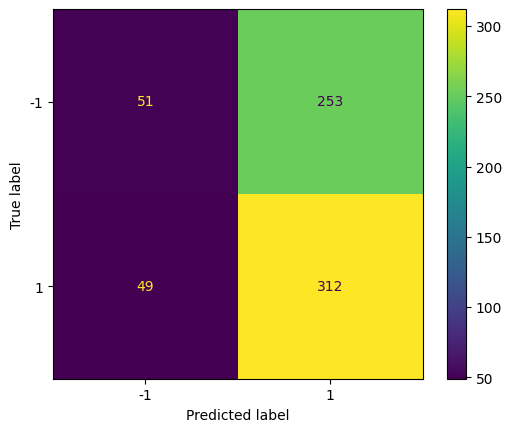

------------------------------------------------------------------------------------------
Training SVM with kernel  linear
Mean accs :  0.5415848978321751
Mean f1_macro 0.36558339469002393
Mean precision 0.5433770125275157
Mean recall 0.49974010731052987


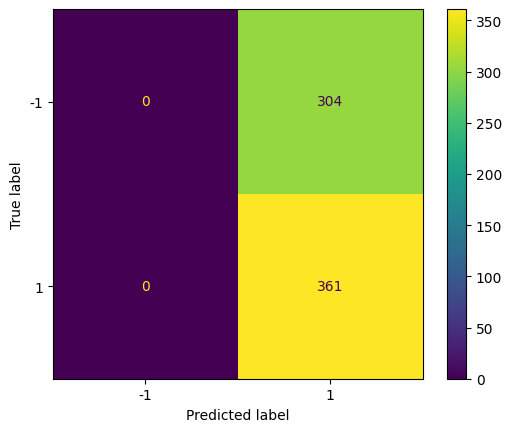

------------------------------------------------------------------------------------------
Training SVM with kernel  sigmoid
Mean accs :  0.5131770563219583
Mean f1_macro 0.508430811763681
Mean precision 0.5508304928713058
Mean recall 0.5086302900706096


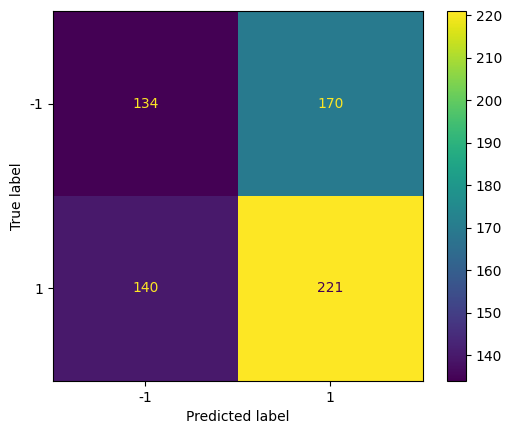

In [11]:
for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    print("---------"*10)
    print("Training SVM with kernel ", kernel)
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
     # Cross 5 fold validation
    cv_scores = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [12]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.predict(X_test)
print(f'Kernel: rbf, score: {clf.score(X_test, y_test)}')

Kernel: rbf, score: 0.5593984962406015


## Random Forest Classifier

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 2
Mean accs :  0.5537012181481707
Mean f1_macro 0.5072196521987761
Mean precision 0.5647425369650501
Mean recall 0.5314705264600822


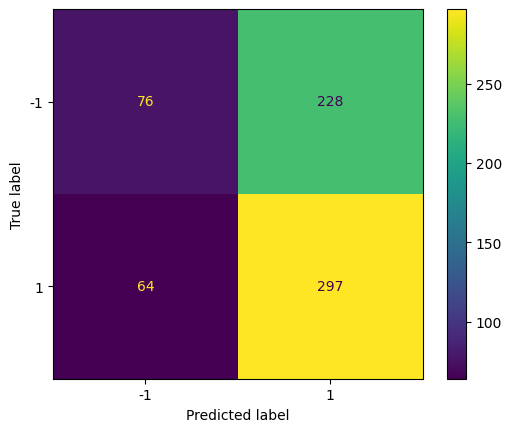

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 3
Mean accs :  0.5442204055070873
Mean f1_macro 0.49238128300252537
Mean precision 0.5563298793885129
Mean recall 0.5204422013369295


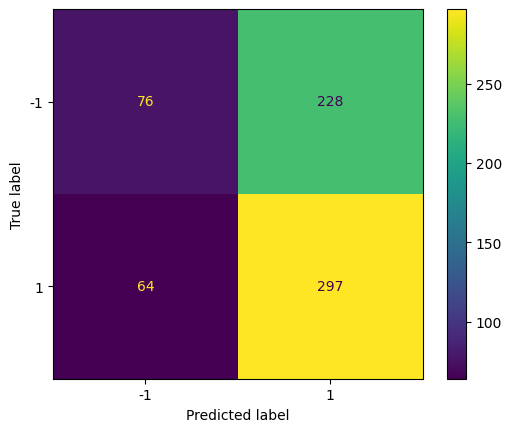

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 5
Mean accs :  0.5433195046061863
Mean f1_macro 0.49236545823977107
Mean precision 0.5559741751670055
Mean recall 0.5197701106419741


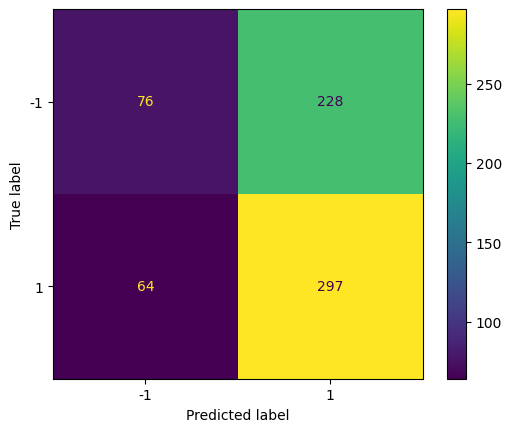

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 10
Mean accs :  0.5342942265064161
Mean f1_macro 0.4943482192513319
Mean precision 0.552598504748106
Mean recall 0.5143551956502805


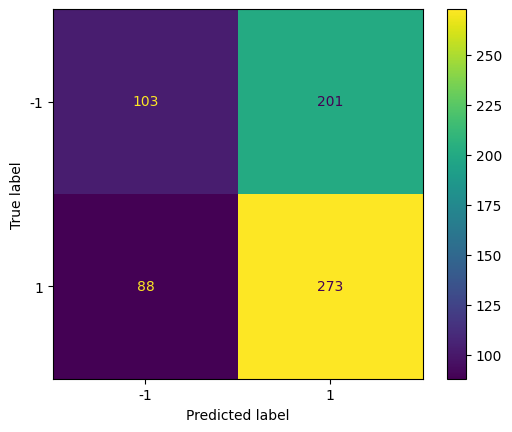

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 15
Mean accs :  0.5379039310190552
Mean f1_macro 0.5059623041125515
Mean precision 0.5572072583462301
Mean recall 0.5198241933221796


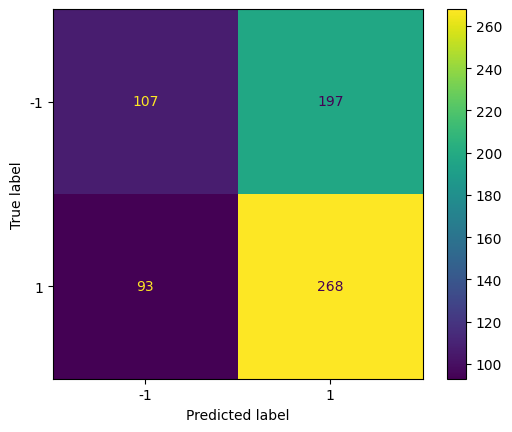

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 20
Mean accs :  0.5284221015597991
Mean f1_macro 0.502544462273122
Mean precision 0.5526612925771236
Mean recall 0.5128718483089443


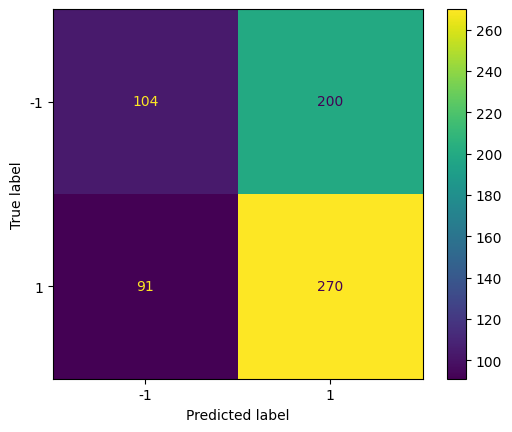

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 50
Mean accs :  0.518497956195473
Mean f1_macro 0.5048367688940718
Mean precision 0.5506554115403517
Mean recall 0.5083747574571451


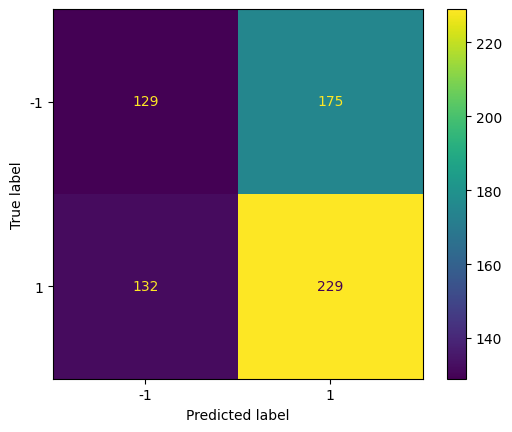

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 2
Mean accs :  0.5537012181481707
Mean f1_macro 0.5072196521987761
Mean precision 0.5647425369650501
Mean recall 0.5314705264600822


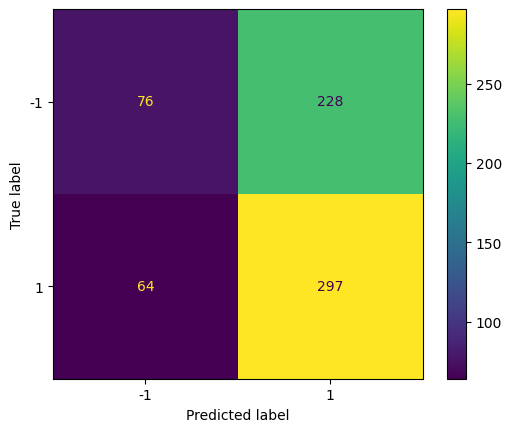

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 3
Mean accs :  0.5442204055070873
Mean f1_macro 0.49238128300252537
Mean precision 0.5563298793885129
Mean recall 0.5204422013369295


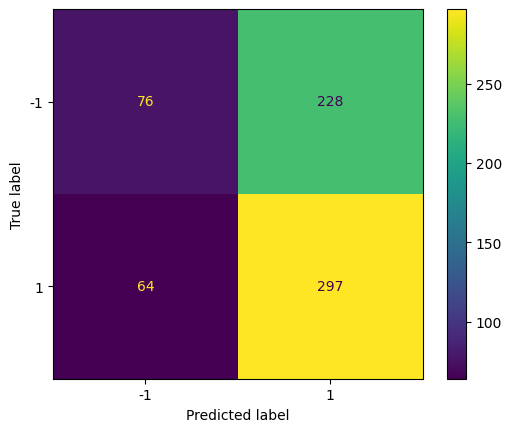

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 5
Mean accs :  0.5392562991885791
Mean f1_macro 0.4859475403503657
Mean precision 0.5530753544300268
Mean recall 0.5152665654164297


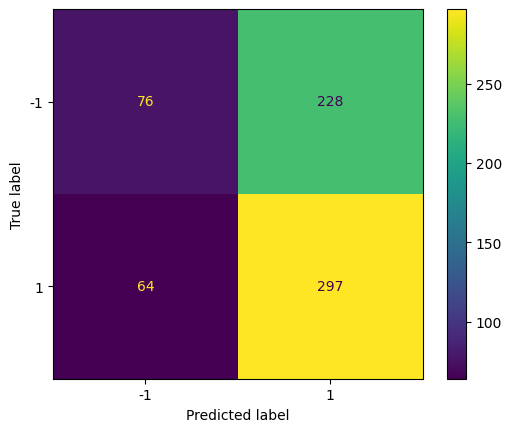

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 10
Mean accs :  0.5306804547210868
Mean f1_macro 0.4822866395182765
Mean precision 0.5491697002672484
Mean recall 0.5086276465192254


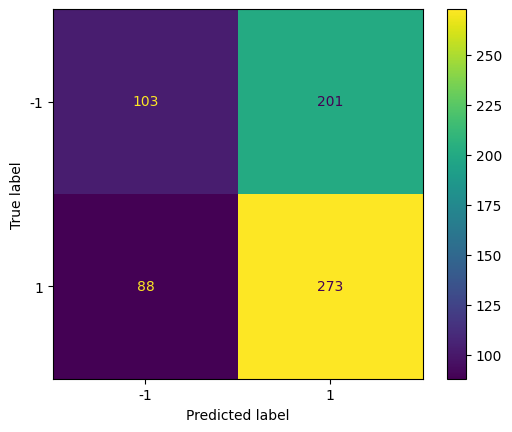

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 15
Mean accs :  0.5306804547210867
Mean f1_macro 0.4876330753025176
Mean precision 0.5503639036137749
Mean recall 0.510221546281828


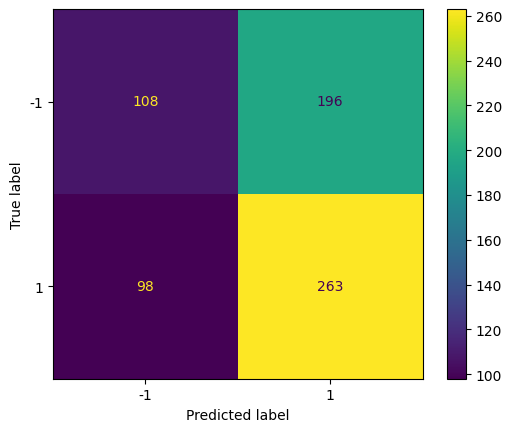

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 20
Mean accs :  0.5270707502084477
Mean f1_macro 0.4855758359038749
Mean precision 0.5485038907452701
Mean recall 0.5073248603297875


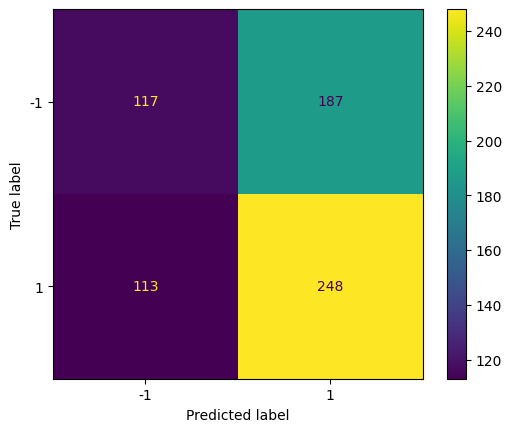

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 50
Mean accs :  0.5139781994183801
Mean f1_macro 0.4903448542928851
Mean precision 0.5451291916433533
Mean recall 0.5007614300818508


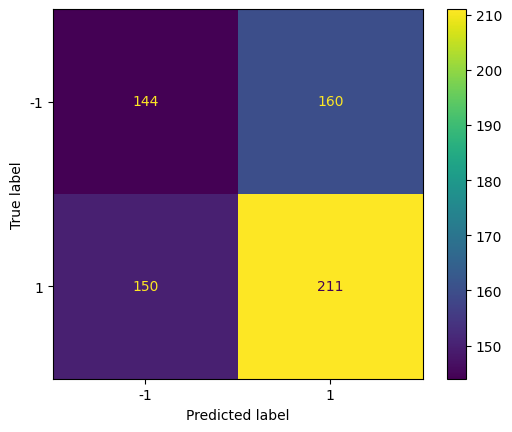

In [13]:
for criterion in ['entropy', 'gini'] :
   # print("---------"*10)
   # print("Training Random Forest with criterion ", criterion)
    
    
    for leafs in [2, 3, 5, 10, 15, 20, 50] :
        print("---------"*10)
        print("Training Random Forest with criterion ", criterion, ",  nodes =",leafs)

        rf = DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=leafs)
        rf.fit(X_train, y_train)

         # Cross 5 fold validation
        cv_scores = cross_validate(rf, X, y, cv=5, scoring=scoring)
        accs = cv_scores['test_accuracy'].mean()
        print("Mean accs : ",accs)
        f1_macros = cv_scores['test_f1_macro'].mean()
        print("Mean f1_macro", f1_macros)
        prec = cv_scores['test_precision'].mean()
        print("Mean precision", prec)
        recall = cv_scores['test_recall'].mean()
        print("Mean recall", recall)

        # cONFUSION matrix
        predictions = rf.predict(X_test)
        cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=rf.classes_)
        disp.plot()
        plt.show()

Accuracy on Test set for 'optimal' random forest is : 0.5609022556390978


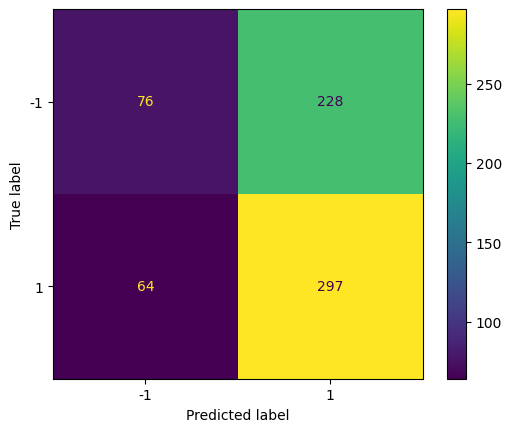

In [14]:
rf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("Accuracy on Test set for 'optimal' random forest is :", score)
# cONFUSION matrix
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=rf.classes_)
disp.plot()
plt.show()